In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('crime_data.csv')

# Display the first few rows of the dataset
print("Initial Data Preview:")
print(data.head())


Initial Data Preview:
         ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
2        THEFT                OVER $500            RESIDENCE   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y

In [2]:
# Clean column names
data.columns = data.columns.str.strip().str.lower()

# Display cleaned column names
print("Cleaned Column Names:", data.columns)

# Drop rows with missing values
data = data.dropna()

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Drop rows where 'date' conversion failed
data = data.dropna(subset=['date'])

# Extract year, month, and hour from 'date'
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['hour'] = data['date'].dt.hour

# Display the cleaned data
print("Cleaned Data Preview:")
print(data.head())


Cleaned Column Names: Index(['id', 'case number', 'date', 'block', 'iucr', 'primary type',
       'description', 'location description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community area', 'fbi code', 'x coordinate',
       'y coordinate', 'year', 'updated on', 'latitude', 'longitude',
       'location'],
      dtype='object')
Cleaned Data Preview:
         id case number                date                block  iucr  \
0  10224738    HY411648 2015-09-05 13:30:00      043XX S WOOD ST  0486   
1  10224739    HY411615 2015-09-04 11:30:00  008XX N CENTRAL AVE  0870   
3  10224740    HY411595 2015-09-05 12:45:00    035XX W BARRY AVE  2023   
4  10224741    HY411610 2015-09-05 13:00:00  0000X N LARAMIE AVE  0560   
5  10224742    HY411435 2015-09-05 10:55:00  082XX S LOOMIS BLVD  0610   

  primary type              description location description  arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKI

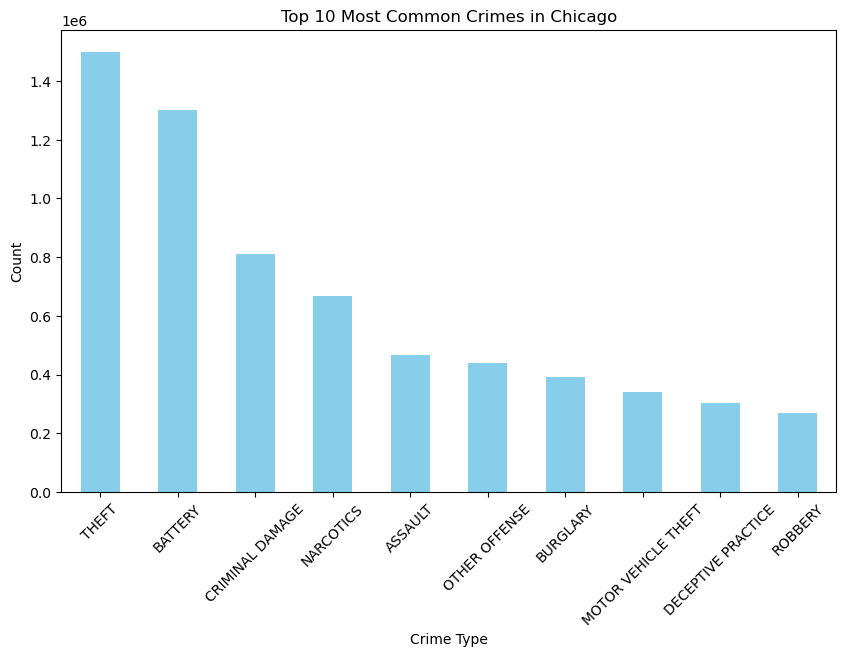

In [3]:
# Count the occurrences of each crime type
crime_counts = data['primary type'].value_counts()

# Plot the top 10 most common crime types
plt.figure(figsize=(10, 6))
crime_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Crimes in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


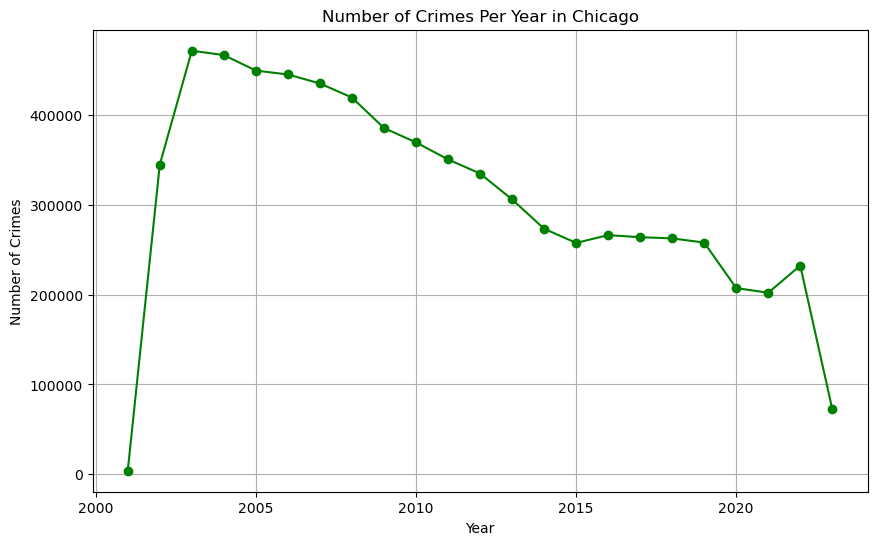

In [4]:
# Group data by year and count crimes
crimes_per_year = data.groupby('year').size()

# Plot crime trends over the years
plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind='line', marker='o', color='green')
plt.title('Number of Crimes Per Year in Chicago')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid()
plt.show()


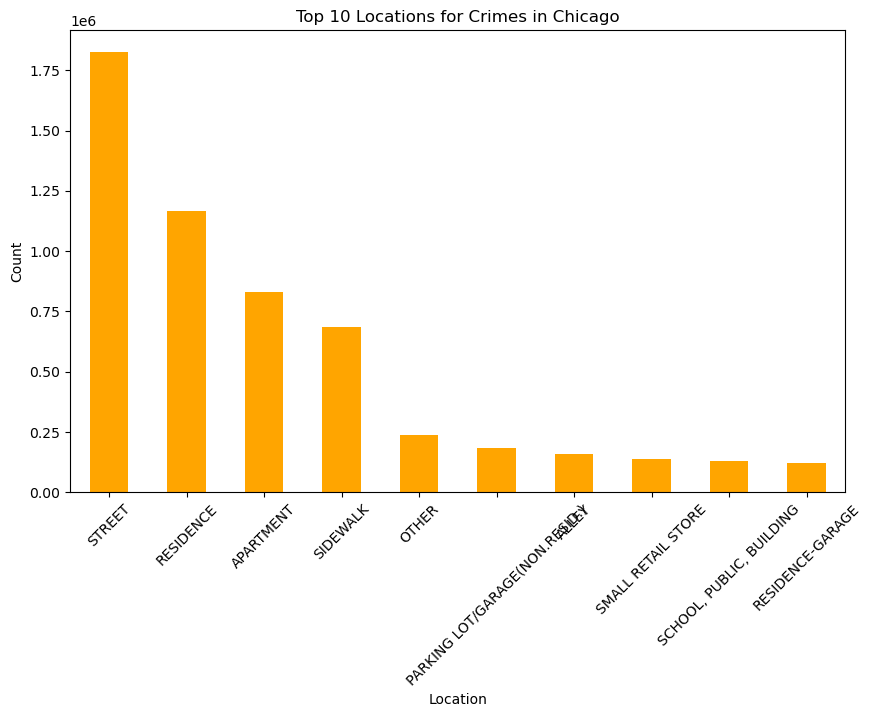

In [9]:
# Count the occurrences by location description
location_counts = data['location description'].value_counts()

# Plot the top 10 crime locations
plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Locations for Crimes in Chicago')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


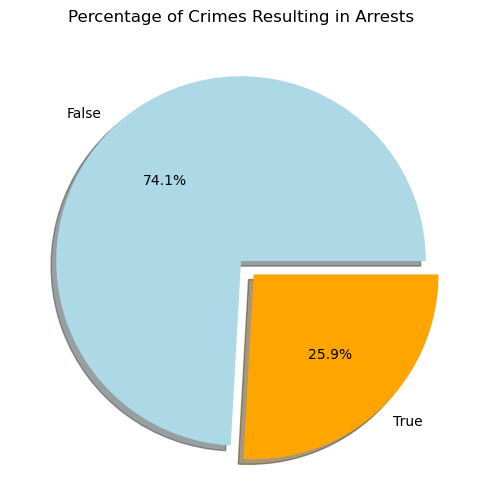

Arrest Percentages:
arrest
False    74.114068
True     25.885932
Name: proportion, dtype: float64


In [11]:
# Calculate the percentage of crimes resulting in an arrest
arrest_counts = data['arrest'].value_counts(normalize=True) * 100

# Plot the arrest percentages
plt.figure(figsize=(6, 6))
arrest_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], explode=(0, 0.1), shadow=True)
plt.title('Percentage of Crimes Resulting in Arrests')
plt.ylabel('')
plt.show()

# Display exact values
print("Arrest Percentages:")
print(arrest_counts)


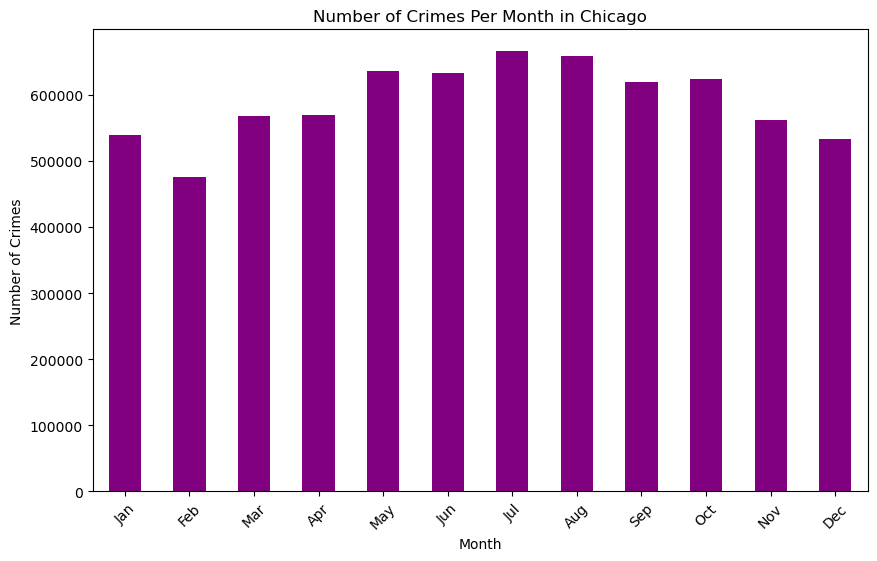

Crimes Per Month:
month
1     538737
2     475877
3     567379
4     569734
5     635656
6     633272
7     665724
8     658995
9     619847
10    624718
11    561296
12    533200
Name: count, dtype: int64


In [13]:
# Group data by month and count crimes
crimes_per_month = data['month'].value_counts().sort_index()

# Plot the number of crimes per month
plt.figure(figsize=(10, 6))
crimes_per_month.plot(kind='bar', color='purple')
plt.title('Number of Crimes Per Month in Chicago')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Display monthly crime counts
print("Crimes Per Month:")
print(crimes_per_month)


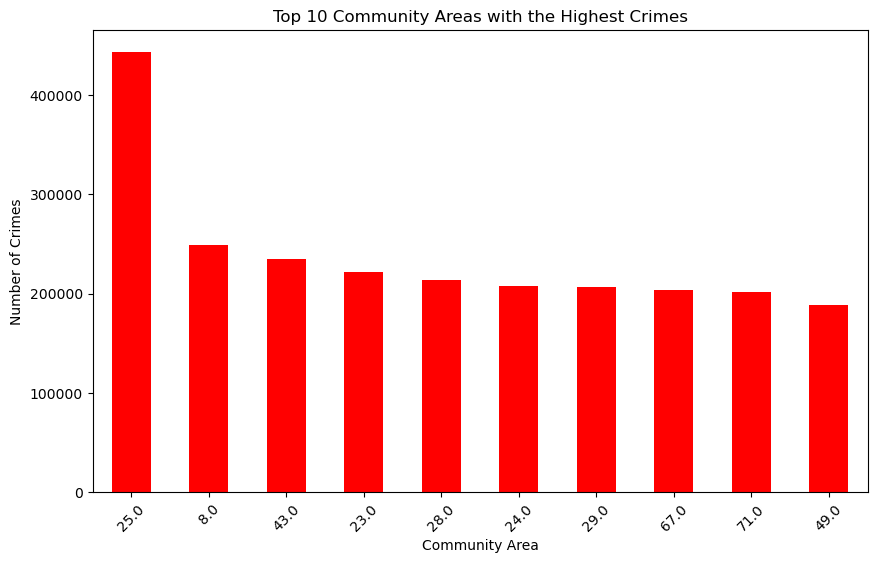

Top 10 Community Areas by Crimes:
community area
25.0    443654
8.0     249001
43.0    234412
23.0    221397
28.0    213872
24.0    207273
29.0    206533
67.0    203194
71.0    201132
49.0    188672
Name: count, dtype: int64


In [15]:
# Group by 'community area' or 'ward' to find areas with the highest crime counts
crime_by_area = data['community area'].value_counts().head(10)

# Plot the top 10 districts or neighborhoods with the most crimes
plt.figure(figsize=(10, 6))
crime_by_area.plot(kind='bar', color='red')
plt.title('Top 10 Community Areas with the Highest Crimes')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Display exact values
print("Top 10 Community Areas by Crimes:")
print(crime_by_area)


## Conclusions and Insights

### 1. Top Crime Types
- Theft and battery are the most common crimes in Chicago.
- These two categories alone account for a significant portion of the total crime incidents.

### 2. Crime Trends Over Time
- Crime rates have fluctuated over the years.
- The data shows a **decline** in reported crimes in recent years, indicating a potential improvement in public safety.

### 3. Top Locations for Crimes
- The most common crime locations include:
  - **Streets**
  - **Residences**
  - **Sidewalks**
- These locations are hotspots for criminal activity, possibly due to their accessibility and public exposure.

### 4. Percentage of Crimes Resulting in Arrest
- Only a small percentage of reported crimes result in an arrest.
- This highlights the challenges faced by law enforcement in resolving cases.

### 5. Crime Rates by Month
- Crimes show significant variations across different months.
- **Summer months** (e.g., June, July, August) typically have higher crime rates compared to winter months.

### 6. Top Districts or Neighborhoods with the Most Crimes
- The highest number of crimes are reported in specific districts or community areas.
- This analysis highlights areas that may require additional resources or security measures.
